In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# ***Generators***

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/catsAndDogs40/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/catsAndDogs40/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 64 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


# ***Normalized***

In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# ***Create CNN Model***

In [5]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

# ***Trainning the CNN***

In [7]:
model.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
2/2 [==============================] - 23s 4s/step - loss: 3.9181 - accuracy: 0.6094 - val_loss: 1.2268 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 205ms/step - loss: 5.3368 - accuracy: 0.8125 - val_loss: 1.1747 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 1s 249ms/step - loss: 2.2852 - accuracy: 0.9219 - val_loss: 1.3378 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 181ms/step - loss: 1.7414 - accuracy: 0.8750 - val_loss: 1.6494 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 248ms/step - loss: 0.2380 - accuracy: 0.9688 - val_loss: 1.4617 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 169ms/step - loss: 0.1075 - accuracy: 0.9688 - val_loss: 1.2983 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 165ms/step - loss: 1.3225 - accuracy: 0.9062 - val_loss: 1.8764 - val_accuracy: 0.5000
Epoch 8/10
2/2 [======

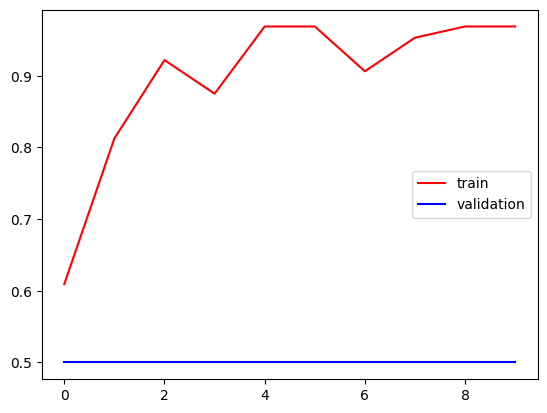

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

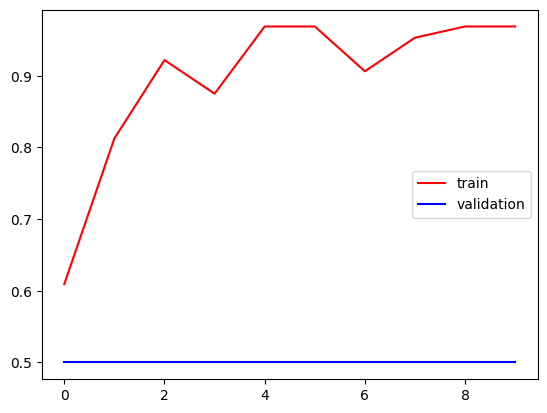

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

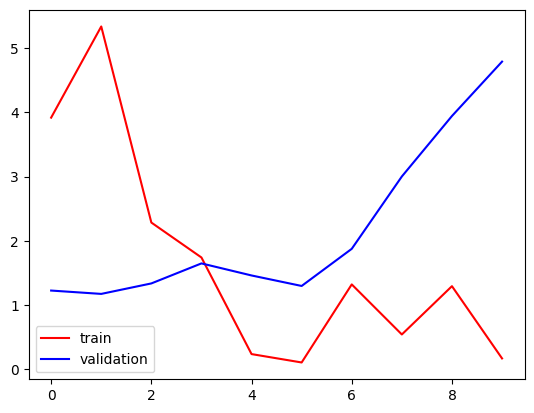

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

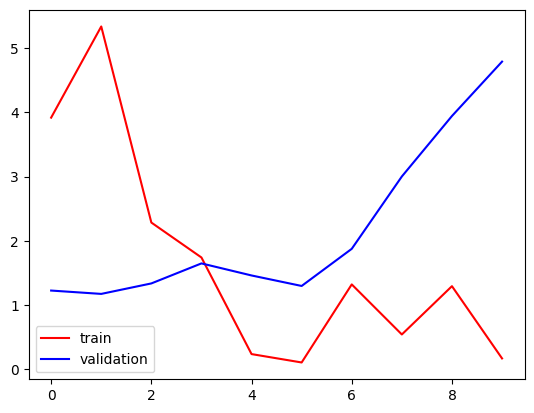

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [20]:
test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/catsAndDogs40/test/cat/5.jpg')

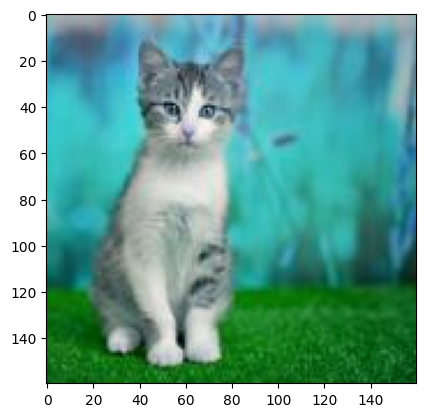

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(160, 160, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
result=model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


In [27]:
result

array([[-88.086784]], dtype=float32)

In [29]:
if result[0]<0:
  print("The image classified is a Cat")
else:
  print("This image classified is a Dog")

The image classified is a Cat
